# MNIST - regression

**Warning**: Don't press **Run all**! The hyper-parameter scan will take a  long time (>60min). Instead run each cell on its own first. I have included the results of the hyper-parameter scan after the code, so you don't have to run the scan on your machine.

In [1]:
# Import packages
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [2]:
# Download and split mnist data
mnist_data = tf.keras.datasets.mnist

(mnist_x_train, mnist_y_train),(mnist_x_test, mnist_y_test) = mnist_data.load_data()
mnist_x_train_normalized, mnist_x_test_normalized = mnist_x_train / 255.0, mnist_x_test / 255.0

## Preprocess data

In [19]:
def get_reduced_training_data_set(desired_number_of_train_samples):
    return mnist_x_train_normalized[:desired_number_of_train_samples], mnist_y_train[:desired_number_of_train_samples]

def reshape_input_data(input_data):
    dimensions = np.shape(input_data)
    number_of_data_samples = dimensions[0]
    number_of_features = dimensions[1]*dimensions[2]

    return input_data.reshape(number_of_data_samples,number_of_features)

In [20]:
# Setting up training and testing data
x_test = reshape_input_data(mnist_x_test_normalized)
y_test = mnist_y_test

number_of_training_samples = 10000
x_train, y_train = get_reduced_training_data_set(number_of_training_samples)
x_train = reshape_input_data(x_train)

## Train models
Now we are ready to use the preprocessed data to train our models.
### Logistic Regression

In [21]:
logistic_regression_model = LogisticRegression(C=1e15,
                         multi_class='multinomial', penalty='l2',solver='sag', tol=0.01)

logistic_regression_model.fit(x_train, y_train)
accuracy = logistic_regression_model.score(x_test,y_test)

# Print out result
"Logistic regression model was able to classify {accuracy:.2f}% of the test data correctly".format(accuracy=accuracy*100)

'Logistic regression model was able to classify 90.37% of the test data correctly'

### Stochastic Gradient Descent Classifier

In [22]:
# SDG Clasifier
sgd_classifier = SGDClassifier()

sgd_classifier.fit(x_train,y_train)
accuracy = sgd_classifier.score(x_test,y_test)

# Print out result
"The stochastic gradient classifier was able to classify {accuracy:.2f}% of the test data correctly".format(accuracy=accuracy*100)

'The stochastic gradient classifier was able to classify 88.23% of the test data correctly'

## Compare correctly and incorrectly predicted digits

In [23]:
# Define some function to pick out plot correct/incorrect predictions
def find_incorrectly_predicted_samples(model):
    indexes_of_incorrectly_predicted_samples = []
    incorrect_predictions = []

    for index, sample in enumerate(x_test):
        prediction = model.predict(sample.reshape(1,784))
        if prediction != y_test[index]:
            indexes_of_incorrectly_predicted_samples.append(index)
            incorrect_predictions.append(prediction)

    return  indexes_of_incorrectly_predicted_samples, incorrect_predictions

def find_correctly_predicted_samples(model):
    indexes_of_incorrectly_predicted_samples = []
    incorrect_predictions = []

    for index, sample in enumerate(x_test):
        prediction = model.predict(sample.reshape(1,784))
        if prediction == y_test[index]:
            indexes_of_incorrectly_predicted_samples.append(index)
            incorrect_predictions.append(prediction)

    return  indexes_of_incorrectly_predicted_samples, incorrect_predictions

def plot_test_samples(sample_indexes, model_predictions, number_of_plots, sample_description):
    plt.figure()
    for i in range(number_of_plots):
        sample_index = sample_indexes[i]
        x_sample = mnist_x_test[sample_index]
        y_sample = mnist_y_test[sample_index]
        prediction = model_predictions[i]

        subplot = plt.subplot(2, number_of_plots/2, i + 1)
        subplot.imshow(x_sample, cmap='gray')
        subplot.set_xticks(())
        subplot.set_yticks(())
        subplot.set_xlabel('A: {y_test}, P: {prediction}'.format(y_test=y_sample, prediction=prediction))
    plt.suptitle("Plots of some {description} predicted test samples (A: actual value, P: prediction) ".format(description=sample_description))

### Logistic Regression

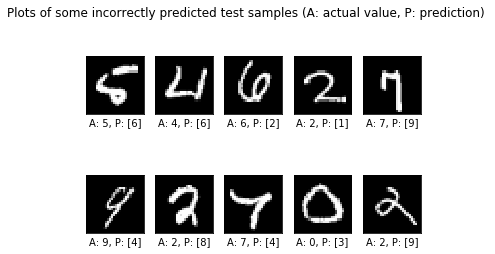

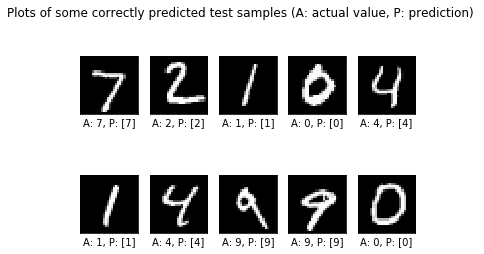

In [24]:
# Find incorrectly and correctly classified numbers
incorrectly_predicted_samples_logistic = find_incorrectly_predicted_samples(logistic_regression_model)
correctly_predicted_samples_logistic = find_correctly_predicted_samples(logistic_regression_model)


# Plot some of the incorrectly/correctly predicted samples
plot_test_samples(incorrectly_predicted_samples_logistic[0], incorrectly_predicted_samples_logistic[1], 10, "incorrectly")
plot_test_samples(correctly_predicted_samples_logistic[0], correctly_predicted_samples_logistic[1], 10, "correctly")

### Stochastic Gradient Descent Classifier

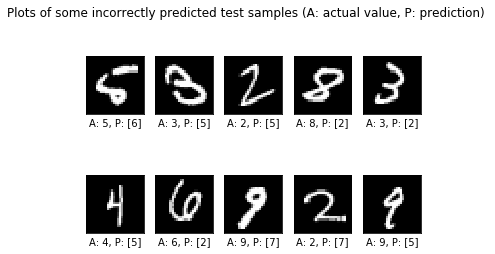

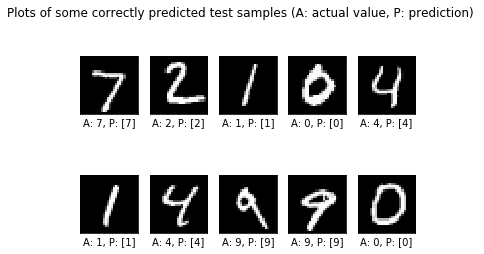

In [25]:
incorrectly_predicted_samples_sdg = find_incorrectly_predicted_samples(sgd_classifier)
correctly_predicted_samples_sdg = find_correctly_predicted_samples(sgd_classifier)

plot_test_samples(incorrectly_predicted_samples_sdg[0], incorrectly_predicted_samples_sdg[1], 10, "incorrectly")
plot_test_samples(correctly_predicted_samples_sdg[0], correctly_predicted_samples_sdg[1], 10, "correctly")

As we can see in the comparison plots above, the incorrectly classified handwritten digits are written ambiguously/unclear and have include features of similar digits which leads our classifiers to make a incorrect prediction (e.g. the 5 with a closed loop, which resulted in a prediction that it is a 6). The correctly predicted images all feature very distinct and clearly written number so our algorithm was able to correctly identify them.

## Hyper-parameter scan
### Logistic Regression

**Warning**: This hyper-parameter scan can take a while (> 30 min). If you don't want to run this scan on your machine, I have included the results of a previous run **below**. 

In [26]:
all_penalties = ['l1','l2','elasticnet']
regularization_strengths = [0.5, 1, 5, 100]
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

results = []

for solver in solvers:
    if solver in ['newton-cg', 'sag', 'lbfgs']:
        penalties = ['l2']
    elif solver == 'saga':
        penalties = all_penalties
    else:
        penalties = ['l1', 'l2']

    for regularization_strength in regularization_strengths:
        for penalty in penalties:
            model = LogisticRegression(penalty=penalty, solver=solver, C=regularization_strength, max_iter=100)
            try:
                model.fit(x_train, y_train)
                accuracy = model.score(x_test,y_test)
                result = {'Solver': solver, 'Penalty': penalty, 'Regularization_strength': regularization_strength, 'Accuracy': accuracy, 'InterationsToConvergence': model.n_iter_}
            except:
                result = {'Solver': solver, 'Penalty': penalty, 'Regularization_strength': regularization_strength, 'Accuracy': '', 'InterationsToConvergence': 'Did not converge'}
                pass

            results.append(result)

results

C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://

[{'Solver': 'newton-cg',
  'Penalty': 'l2',
  'Regularization_strength': 0.5,
  'Accuracy': 0.9089,
  'InterationsToConvergence': array([21])},
 {'Solver': 'newton-cg',
  'Penalty': 'l2',
  'Regularization_strength': 1,
  'Accuracy': 0.905,
  'InterationsToConvergence': array([22])},
 {'Solver': 'newton-cg',
  'Penalty': 'l2',
  'Regularization_strength': 5,
  'Accuracy': 0.894,
  'InterationsToConvergence': array([22])},
 {'Solver': 'newton-cg',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.8812,
  'InterationsToConvergence': array([29])},
 {'Solver': 'lbfgs',
  'Penalty': 'l2',
  'Regularization_strength': 0.5,
  'Accuracy': 0.9093,
  'InterationsToConvergence': array([100])},
 {'Solver': 'lbfgs',
  'Penalty': 'l2',
  'Regularization_strength': 1,
  'Accuracy': 0.9041,
  'InterationsToConvergence': array([100])},
 {'Solver': 'lbfgs',
  'Penalty': 'l2',
  'Regularization_strength': 5,
  'Accuracy': 0.8951,
  'InterationsToConvergence': array([100])},
 {'Solver':

Results from a run on my computer

In [ ]:
results_last_run = [{'Solver': 'newton-cg',
  'Penalty': 'l2',
  'Regularization_strength': 0.5,
  'Accuracy': 0.9089,
  'InterationsToConvergence': 21},
 {'Solver': 'newton-cg',
  'Penalty': 'l2',
  'Regularization_strength': 1,
  'Accuracy': 0.905,
  'InterationsToConvergence': 22},
 {'Solver': 'newton-cg',
  'Penalty': 'l2',
  'Regularization_strength': 5,
  'Accuracy': 0.894,
  'InterationsToConvergence': 22},
 {'Solver': 'newton-cg',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.8812,
  'InterationsToConvergence': 29},
 {'Solver': 'lbfgs',
  'Penalty': 'l2',
  'Regularization_strength': 0.5,
  'Accuracy': 0.9093,
  'InterationsToConvergence': 100},
 {'Solver': 'lbfgs',
  'Penalty': 'l2',
  'Regularization_strength': 1,
  'Accuracy': 0.9041,
  'InterationsToConvergence': 100},
 {'Solver': 'lbfgs',
  'Penalty': 'l2',
  'Regularization_strength': 5,
  'Accuracy': 0.8951,
  'InterationsToConvergence': 100},
 {'Solver': 'lbfgs',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.887,
  'InterationsToConvergence': 100},
 {'Solver': 'liblinear',
  'Penalty': 'l1',
  'Regularization_strength': 0.5,
  'Accuracy': 0.9051,
  'InterationsToConvergence': 20},
 {'Solver': 'liblinear',
  'Penalty': 'l2',
  'Regularization_strength': 0.5,
  'Accuracy': 0.9055,
  'InterationsToConvergence': 12},
 {'Solver': 'liblinear',
  'Penalty': 'l1',
  'Regularization_strength': 1,
  'Accuracy': 0.9058,
  'InterationsToConvergence': 19},
 {'Solver': 'liblinear',
  'Penalty': 'l2',
  'Regularization_strength': 1,
  'Accuracy': 0.9053,
  'InterationsToConvergence': 13},
 {'Solver': 'liblinear',
  'Penalty': 'l1',
  'Regularization_strength': 5,
  'Accuracy': 0.8949,
  'InterationsToConvergence': 22},
 {'Solver': 'liblinear',
  'Penalty': 'l2',
  'Regularization_strength': 5,
  'Accuracy': 0.897,
  'InterationsToConvergence': 16},
 {'Solver': 'liblinear',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.8718,
  'InterationsToConvergence': 28},
 {'Solver': 'liblinear',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.8792,
  'InterationsToConvergence': 39},
 {'Solver': 'sag',
  'Penalty': 'l2',
  'Regularization_strength': 0.5,
  'Accuracy': 0.9091,
  'InterationsToConvergence': 100},
 {'Solver': 'sag',
  'Penalty': 'l2',
  'Regularization_strength': 1,
  'Accuracy': 0.9051,
  'InterationsToConvergence': 100},
 {'Solver': 'sag',
  'Penalty': 'l2',
  'Regularization_strength': 5,
  'Accuracy': 0.8992,
  'InterationsToConvergence': 100},
 {'Solver': 'sag',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.8976,
  'InterationsToConvergence': 100},
 {'Solver': 'saga',
  'Penalty': 'l1',
  'Regularization_strength': 0.5,
  'Accuracy': 0.9093,
  'InterationsToConvergence': 100},
 {'Solver': 'saga',
  'Penalty': 'l2',
  'Regularization_strength': 0.5,
  'Accuracy': 0.9096,
  'InterationsToConvergence': 100},
 {'Solver': 'saga',
  'Penalty': 'elasticnet',
  'Regularization_strength': 0.5,
  'Accuracy': '',
  'InterationsToConvergence': 'Did not converge'},
 {'Solver': 'saga',
  'Penalty': 'l1',
  'Regularization_strength': 1,
  'Accuracy': 0.9091,
  'InterationsToConvergence': 100},
 {'Solver': 'saga',
  'Penalty': 'l2',
  'Regularization_strength': 1,
  'Accuracy': 0.9061,
  'InterationsToConvergence': 100},
 {'Solver': 'saga',
  'Penalty': 'elasticnet',
  'Regularization_strength': 1,
  'Accuracy': '',
  'InterationsToConvergence': 'Did not converge'},
 {'Solver': 'saga',
  'Penalty': 'l1',
  'Regularization_strength': 5,
  'Accuracy': 0.9042,
  'InterationsToConvergence': 100},
 {'Solver': 'saga',
  'Penalty': 'l2',
  'Regularization_strength': 5,
  'Accuracy': 0.9033,
  'InterationsToConvergence': 100},
 {'Solver': 'saga',
  'Penalty': 'elasticnet',
  'Regularization_strength': 5,
  'Accuracy': '',
  'InterationsToConvergence': 'Did not converge'},
 {'Solver': 'saga',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.9029,
  'InterationsToConvergence': 100},
 {'Solver': 'saga',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.9029,
  'InterationsToConvergence': 100},
 {'Solver': 'saga',
  'Penalty': 'elasticnet',
  'Regularization_strength': 100,
  'Accuracy': '',
  'InterationsToConvergence': 'Did not converge'}]

This result array shows that some hyper-parameter configurations were not able to reach convergence. Although if the model converges it had pretty good accuracy 87% - 90%. So we see it's import to try out different hyper-parameter configurations to see which one needs less time to converge.

### Stochastic Gradient Descent Classifier
**Warning**: This hyper-parameter scan can take a while (> 30 min). If you don't want to run this scan on your machine, I have included the results of a previous run **below**.

In [32]:
losses = ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalties = ['l1','l2','elasticnet']

results = []

for loss in losses:
    for penalty in penalties:
        model = SGDClassifier(loss=loss, penalty=penalty)
        model.fit(x_train, y_train)
        accuracy = model.score(x_test, y_test)
        result = {'Loss': loss, 'Penalty': penalty, 'Regularization_strength': regularization_strength, 'Accuracy': accuracy, 'InterationsToConvergence': model.n_iter_}
        results.append(result)

results

C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\Simon\Anaconda3\envs\RL_in_fundamental_physics\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before 

[{'Loss': 'hinge',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.8829,
  'InterationsToConvergence': 196},
 {'Loss': 'hinge',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.8916,
  'InterationsToConvergence': 75},
 {'Loss': 'hinge',
  'Penalty': 'elasticnet',
  'Regularization_strength': 100,
  'Accuracy': 0.8915,
  'InterationsToConvergence': 88},
 {'Loss': 'log',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.8793,
  'InterationsToConvergence': 167},
 {'Loss': 'log',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.8976,
  'InterationsToConvergence': 62},
 {'Loss': 'log',
  'Penalty': 'elasticnet',
  'Regularization_strength': 100,
  'Accuracy': 0.8896,
  'InterationsToConvergence': 59},
 {'Loss': 'modified_huber',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.8728,
  'InterationsToConvergence': 723},
 {'Loss': 'modified_huber',
  'Penalty': 'l2',
  'Regularization_strength':

Results from a run on my computer:

In [ ]:
[{'Loss': 'hinge',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.8793,
  'InterationsToConvergence': 200},
 {'Loss': 'hinge',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.8892,
  'InterationsToConvergence': 74},
 {'Loss': 'hinge',
  'Penalty': 'elasticnet',
  'Regularization_strength': 100,
  'Accuracy': 0.892,
  'InterationsToConvergence': 79},
 {'Loss': 'log',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.8815,
  'InterationsToConvergence': 177},
 {'Loss': 'log',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.8917,
  'InterationsToConvergence': 61},
 {'Loss': 'log',
  'Penalty': 'elasticnet',
  'Regularization_strength': 100,
  'Accuracy': 0.892,
  'InterationsToConvergence': 57},
 {'Loss': 'modified_huber',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.8769,
  'InterationsToConvergence': 792},
 {'Loss': 'modified_huber',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.8517,
  'InterationsToConvergence': 102},
 {'Loss': 'modified_huber',
  'Penalty': 'elasticnet',
  'Regularization_strength': 100,
  'Accuracy': 0.8667,
  'InterationsToConvergence': 122},
 {'Loss': 'squared_hinge',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.8815,
  'InterationsToConvergence': 586},
 {'Loss': 'squared_hinge',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.8428,
  'InterationsToConvergence': 406},
 {'Loss': 'squared_hinge',
  'Penalty': 'elasticnet',
  'Regularization_strength': 100,
  'Accuracy': 0.8376,
  'InterationsToConvergence': 437},
 {'Loss': 'perceptron',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.8825,
  'InterationsToConvergence': 186},
 {'Loss': 'perceptron',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.874,
  'InterationsToConvergence': 65},
 {'Loss': 'perceptron',
  'Penalty': 'elasticnet',
  'Regularization_strength': 100,
  'Accuracy': 0.8676,
  'InterationsToConvergence': 81},
 {'Loss': 'squared_loss',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.1056,
  'InterationsToConvergence': 853},
 {'Loss': 'squared_loss',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.1027,
  'InterationsToConvergence': 1000},
 {'Loss': 'squared_loss',
  'Penalty': 'elasticnet',
  'Regularization_strength': 100,
  'Accuracy': 0.1072,
  'InterationsToConvergence': 1000},
 {'Loss': 'huber',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.6502,
  'InterationsToConvergence': 13},
 {'Loss': 'huber',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.6261,
  'InterationsToConvergence': 29},
 {'Loss': 'huber',
  'Penalty': 'elasticnet',
  'Regularization_strength': 100,
  'Accuracy': 0.6538,
  'InterationsToConvergence': 17},
 {'Loss': 'epsilon_insensitive',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.668,
  'InterationsToConvergence': 70},
 {'Loss': 'epsilon_insensitive',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.6954,
  'InterationsToConvergence': 268},
 {'Loss': 'epsilon_insensitive',
  'Penalty': 'elasticnet',
  'Regularization_strength': 100,
  'Accuracy': 0.6614,
  'InterationsToConvergence': 77},
 {'Loss': 'squared_epsilon_insensitive',
  'Penalty': 'l1',
  'Regularization_strength': 100,
  'Accuracy': 0.0559,
  'InterationsToConvergence': 633},
 {'Loss': 'squared_epsilon_insensitive',
  'Penalty': 'l2',
  'Regularization_strength': 100,
  'Accuracy': 0.1048,
  'InterationsToConvergence': 1000},
 {'Loss': 'squared_epsilon_insensitive',
  'Penalty': 'elasticnet',
  'Regularization_strength': 100,
  'Accuracy': 0.0928,
  'InterationsToConvergence': 1000}]

In contrast to the Logistic Regression the results from the scan of different SGD Classifiers show that not all configurations yield good results. Some configurations have an accuracy even below 10%, which is worse than random guessing (See below). So here we see that although an approach like SDG Classifier can yield very good results, there are also configurations that will let the SDG Classifier seem like a bad solution choice. So to conclude, the hyper-parameters do not only impact the convergence time, they can equally affect the performance as well.

## Random Guessing

In [28]:
def predict_random_number():
    return np.random.randint(0,10)

result = [y == predict_random_number() for y in y_test]

accuracy = result.count(True) / len(y_test)
"Random guessing was able to guess {accuracy:.2f}% of the test data correctly".format(accuracy=accuracy*100)

'Random guessing was able to guess 10.10% of the test data correctly'

As expected a random guessing approach will reach an accuracy of about 10% given 10 different digits that are to be classified.